### Milestone 3: Beyond Descriptive Stats (Dive Deeper/Go Broader)

In this milestone, you will go beyond the descriptive statistics you completed in the last milestone. This milestone is really about diving deeper to analyze your data, beyond descriptive stats. Maybe you need to analyze qualitative data or textual data to get a full picture.

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|amount_tsh | Total static head (amount water available to waterpoint)	|
|date_recorded |The date the row was entered	|
|funder |Who funded the well	|
|gps_height |Altitude of the well	|
|installer |Organization that installed the well	|
|longitude |GPS coordinate	|
|latitude |GPS coordinate	|
|wpt_name |Name of the waterpoint if there is one	|
|num_private |	|
|basin |Geographic water basin	|
|subvillage |Geographic location	|
|region |Geographic location	|
|region_code | Geographic location (coded)	|
|district_code |Geographic location (coded)	|
|lga |Geographic location	|
|ward |Geographic location	|
|population |Population around the well	|
|public_meeting |True/False	|
|recorded_by |Group entering this row of data	|
|scheme_management |Who operates the waterpoint	|
|scheme_name |Who operates the waterpoint	|
|permit | If the waterpoint is permitted	|
|construction_year |Year the waterpoint was constructed	|
|extraction_type |The kind of extraction the waterpoint uses	|
|extraction_type_group |The kind of extraction the waterpoint uses	|
|extraction_type_class |The kind of extraction the waterpoint uses	|
|management |How the waterpoint is managed	|
|management_group |How the waterpoint is managed	|
|payment |What the water costs	|
|payment_type |What the water costs	|
|water_quality |The quality of the water	|
|quality_group |The quality of the water	|
|quantity |The quantity of water	|
|quantity_group |The quantity of water	|
|source |The source of the water	|
|source_type |The source of the water	|
|source_class |The source of the water	|
|waterpoint_type |The kind of waterpoint	|
|waterpoint_type_group |The kind of waterpoint	|
|functional |the waterpoint is operational and there are no repairs needed	|
|non functional | the waterpoint is not operational |

### Dive Deeper

Look deeper into the features you are investigating, consider:

- Relationships / Correlation, Pearson Correlation
- Linear Regression for future prediction (if the relationship is linear)
- Textual Analysis for TF-IDF (Term Frequency-Inverse Document Frequency; Row-based and column-based, stop-word removal?

Specify 1-2 correlations you discovered. List the fields that you found to be correlated and describe what you learned from these correlations.

The outcomes will be binary, hence correlation done is not useful in this context. Recommend tree-based modeling for classification case.

### Go Broader

Expand the features you are investigating. Look for connections/relationships that you may have initially missed.

- What jumps out at you now?
- Use the descriptive stats to point you to features that you may now want to consider.

What key terms did you discover in any text analysis, for whom? Any themes? If you are not analyzing text, summarize what other things you are considering in your analysis?

1. Public Meeting areas has more pumps.
2. Majority of pumps installed have government permits
3. Gravity kind of extraction the pump uses mostly
4. Majority of users never pay for water
5. Main sources are groundwater

### New Metric

Create 1 or 2 new metrics to track relationships of data you discovered. Explain why you created them.

Metric is binary outcome.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

In [2]:
df = pd.read_csv("train.csv",parse_dates=['date_recorded'])

In [3]:
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-06-03,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-03-05,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-07-05,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-11-04,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-08-03,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     59400 non-null  int64         
 1   amount_tsh             59400 non-null  float64       
 2   date_recorded          59400 non-null  datetime64[ns]
 3   funder                 55765 non-null  object        
 4   gps_height             59400 non-null  int64         
 5   installer              55745 non-null  object        
 6   longitude              59400 non-null  float64       
 7   latitude               59400 non-null  float64       
 8   wpt_name               59400 non-null  object        
 9   num_private            59400 non-null  int64         
 10  basin                  59400 non-null  object        
 11  subvillage             59029 non-null  object        
 12  region                 59400 non-null  object        
 13  r

In [5]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [6]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group'], dtype='object')

In [7]:
df['funder'].value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Babtest                      1
Nyangere                     1
Simango Kihengu              1
Erre Kappa                   1
Muslimu Society(shia)        1
Name: funder, Length: 1897, dtype: int64

In [8]:
df['installer'].value_counts()

DWE                               17402
Government                         1825
RWE                                1206
Commu                              1060
DANIDA                             1050
                                  ...  
AFRICAN REFLECTIONS FOUNDATION        1
VC                                    1
go                                    1
Gerald Mila                           1
Bonite Bottles Ltd                    1
Name: installer, Length: 2145, dtype: int64

In [9]:
df['wpt_name'].value_counts()

none                    3563
Shuleni                 1748
Zahanati                 830
Msikitini                535
Kanisani                 323
                        ... 
Kwa Bwana Ventura          1
Kwa Winie Msagafu          1
Kwa Timothy Mbembati       1
Sabasaba                   1
Kwa Mama Judith            1
Name: wpt_name, Length: 37400, dtype: int64

In [10]:
df['num_private'].value_counts()

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

In [11]:
df['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [12]:
df['subvillage'].value_counts()

Madukani     508
Shuleni      506
Majengo      502
Kati         373
Mtakuja      262
            ... 
Bunyonya       1
Maninga        1
Mkatoni        1
Majiwe         1
Heka Kati      1
Name: subvillage, Length: 19287, dtype: int64

In [13]:
df['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [14]:
df['region_code'].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [15]:
df['district_code'].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [16]:
df['lga'].value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [17]:
df['ward'].value_counts()

Igosi               307
Imalinyi            252
Siha Kati           232
Mdandu              231
Nduruma             217
                   ... 
Themi                 1
Kitete                1
Mwanga Kaskazini      1
Mawenzi               1
Korongoni             1
Name: ward, Length: 2092, dtype: int64

In [18]:
df['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [19]:
df['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [20]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [21]:
df['scheme_name'].value_counts()

K                                     682
None                                  644
Borehole                              546
Chalinze wate                         405
M                                     400
                                     ... 
Mwigimbi piped scheme                   1
Kakonko/Mbizi gravity water supply      1
Pwani water supply                      1
Mradi wa maji wa matalawe               1
QUICK WINDS                             1
Name: scheme_name, Length: 2696, dtype: int64

In [22]:
df['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [23]:
df['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [24]:
df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [25]:
df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [26]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [27]:
df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [28]:
df['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [29]:
df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [30]:
df['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [31]:
df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [32]:
df['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [33]:
df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [34]:
df['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [35]:
df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [36]:
df['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [37]:
df['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [38]:
df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [39]:
df['waterpoint_type_group'].value_counts()

communal standpipe    34624
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [40]:
df['status_group'].value_counts()

functional        32258
non functional    27141
Name: status_group, dtype: int64

### Data Visualization

### Univariate Data Exploration

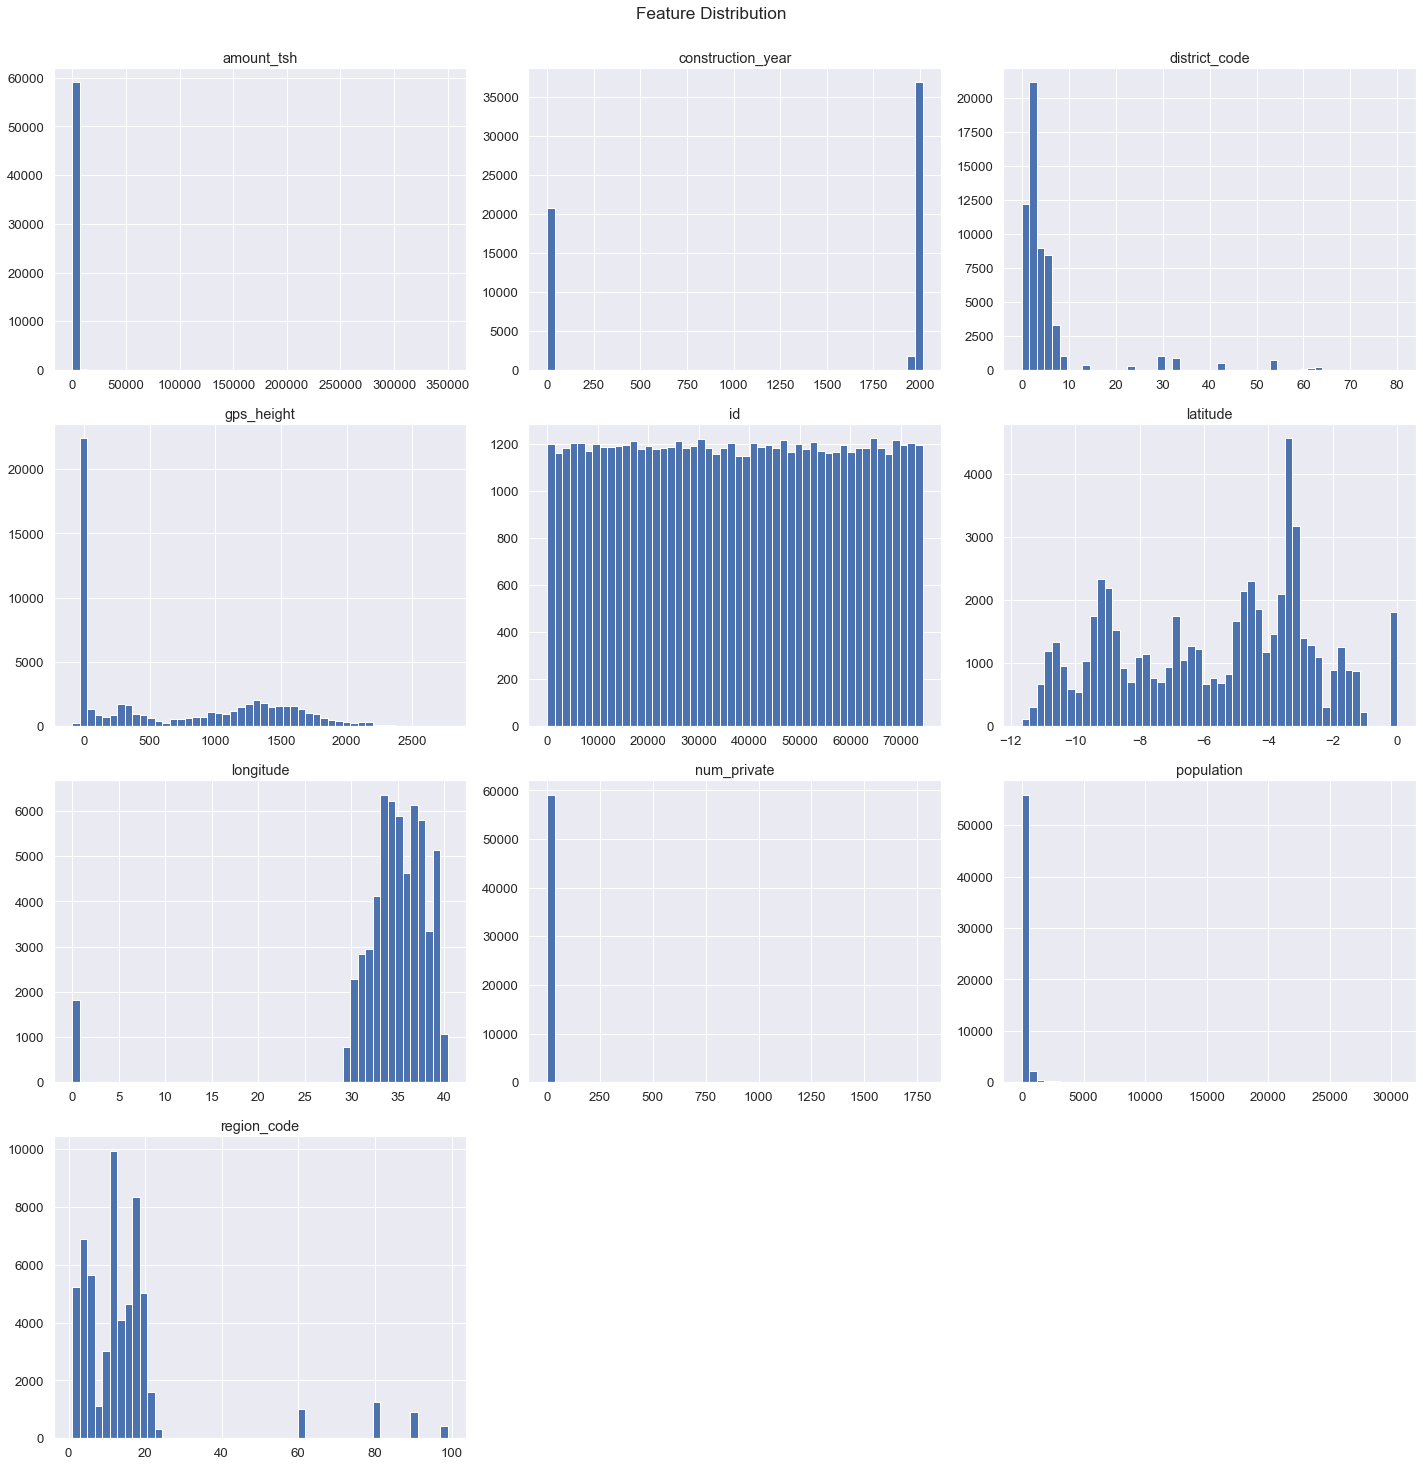

In [41]:
df.hist(bins=50, figsize=(20,20))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

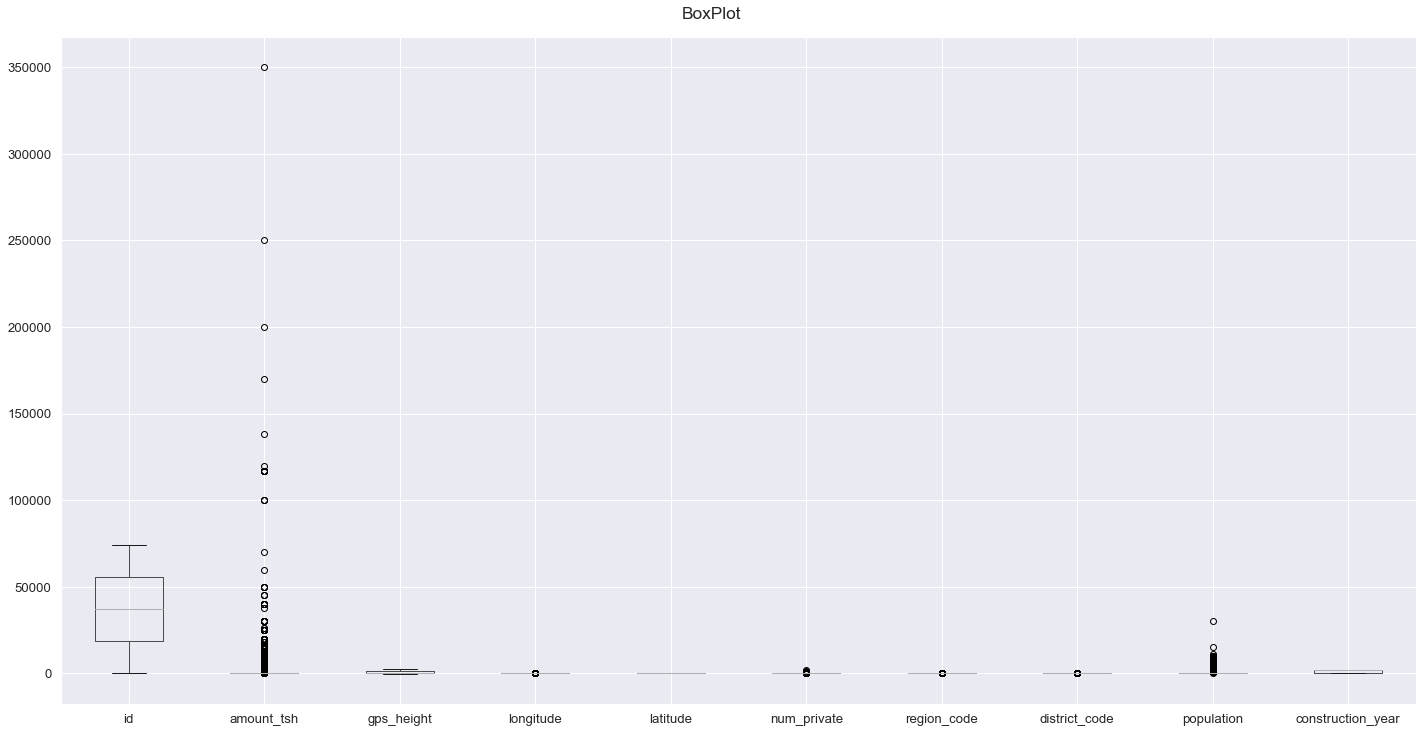

In [42]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

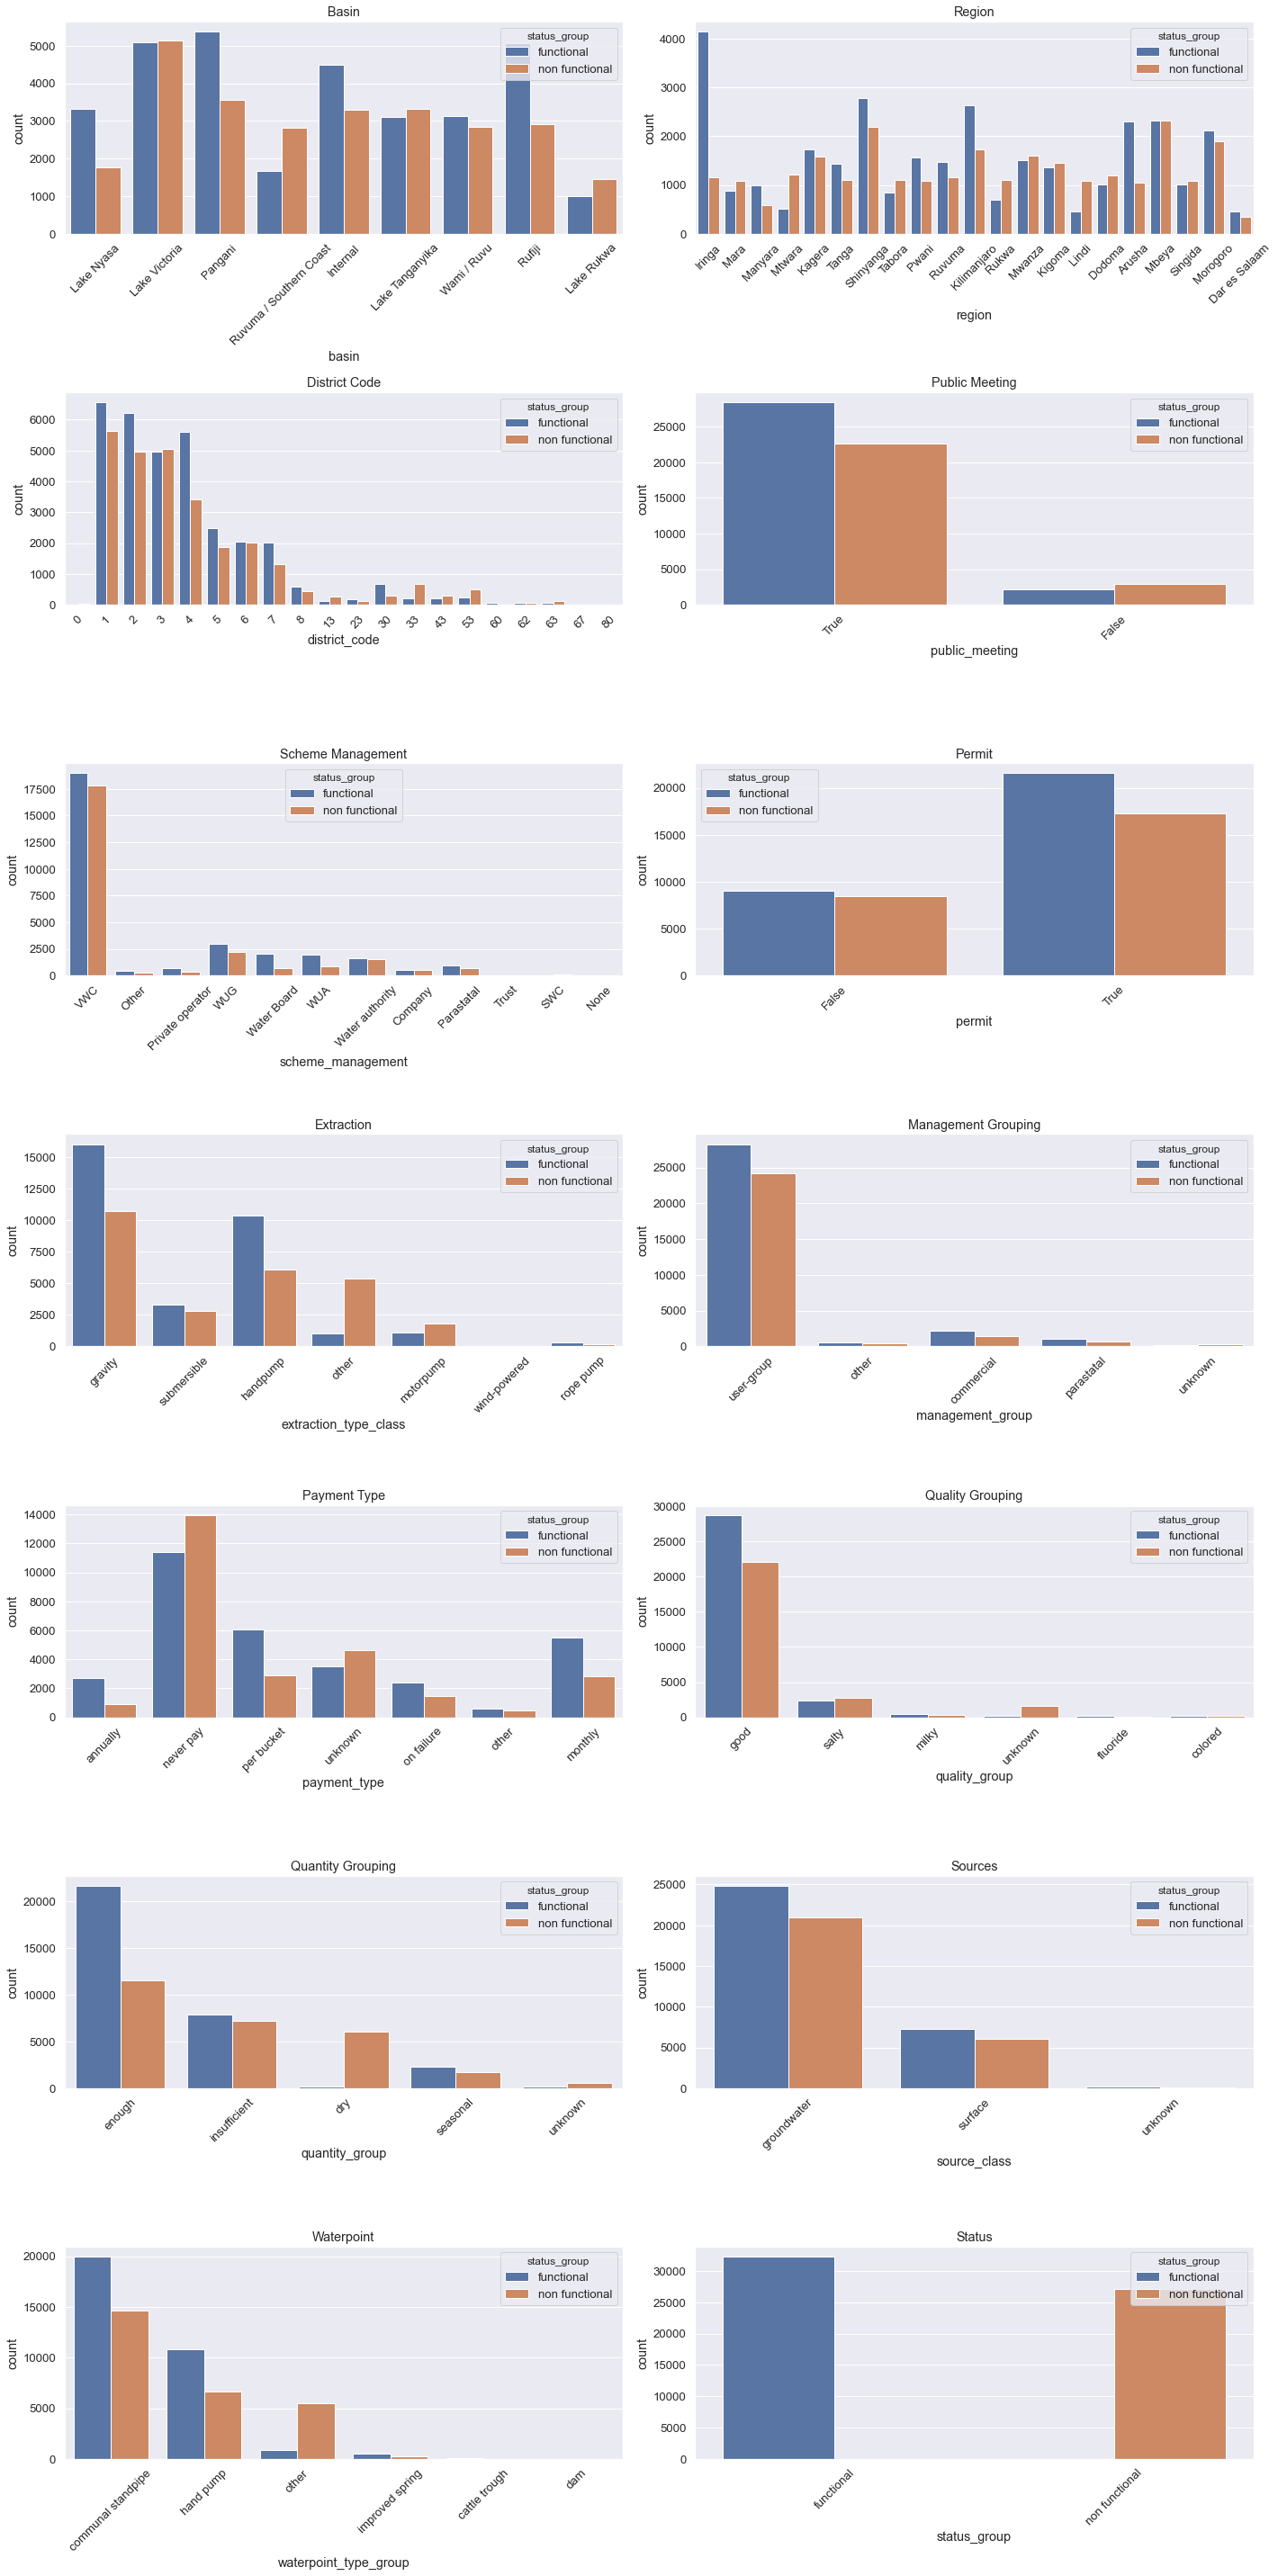

In [43]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
plt.title("Basin")
plt.xticks(rotation=45)
sns.countplot(x='basin',hue='status_group',data=df)

plt.subplot(7,2,2)
plt.title("Region")
plt.xticks(rotation=45)
sns.countplot(x='region',hue='status_group',data=df)

plt.subplot(7,2,3)
plt.title("District Code")
plt.xticks(rotation=45)
sns.countplot(x='district_code',hue='status_group',data=df)

plt.subplot(7,2,4)
plt.title("Public Meeting")
plt.xticks(rotation=45)
sns.countplot(x='public_meeting',hue='status_group',data=df)

plt.subplot(7,2,5)
plt.title("Scheme Management")
plt.xticks(rotation=45)
sns.countplot(x='scheme_management',hue='status_group',data=df)

plt.subplot(7,2,6)
plt.title("Permit")
plt.xticks(rotation=45)
sns.countplot(x='permit',hue='status_group',data=df)

plt.subplot(7,2,7)
plt.title("Extraction")
plt.xticks(rotation=45)
sns.countplot(x='extraction_type_class',hue='status_group',data=df)

plt.subplot(7,2,8)
plt.title("Management Grouping")
plt.xticks(rotation=45)
sns.countplot(x='management_group',hue='status_group',data=df)


plt.subplot(7,2,9)
plt.title("Payment Type")
plt.xticks(rotation=45)
sns.countplot(x='payment_type',hue='status_group',data=df)


plt.subplot(7,2,10)
plt.title("Quality Grouping")
plt.xticks(rotation=45)
sns.countplot(x='quality_group',hue='status_group',data=df)


plt.subplot(7,2,11)
plt.title("Quantity Grouping")
plt.xticks(rotation=45)
sns.countplot(x='quantity_group',hue='status_group',data=df)


plt.subplot(7,2,12)
plt.title("Sources")
plt.xticks(rotation=45)
sns.countplot(x='source_class',hue='status_group',data=df)


plt.subplot(7,2,13)
plt.title("Waterpoint")
plt.xticks(rotation=45)
sns.countplot(x='waterpoint_type_group',hue='status_group',data=df)


plt.subplot(7,2,14)
plt.title("Status")
plt.xticks(rotation=45)
sns.countplot(x='status_group',hue='status_group',data=df)


plt.tight_layout()
plt.show()

In [44]:
# plt.figure(figsize=(20,20))
# plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
# sns.pairplot(df.sample(1000))
# plt.show()

### Drop similarly and irrelevant columns

In [45]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group'], dtype='object')

In [46]:
df.drop(['id','date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude',
        'wpt_name', 'num_private','subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
        'recorded_by','scheme_name','extraction_type', 'extraction_type_group','management',
        'payment','water_quality','quantity','source', 'source_type','waterpoint_type'],axis=1,inplace=True)

In [47]:
df

,amount_tsh,basin,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,status_group
0,6000.0,Lake Nyasa,109,True,VWC,False,1999,gravity,user-group,annually,good,enough,groundwater,communal standpipe,functional
1,0.0,Lake Victoria,280,NaN,Other,True,2010,gravity,user-group,never pay,good,insufficient,surface,communal standpipe,functional
2,25.0,Pangani,250,True,VWC,True,2009,gravity,user-group,per bucket,good,enough,surface,communal standpipe,functional
3,0.0,Ruvuma / Southern Coast,58,True,VWC,True,1986,submersible,user-group,never pay,good,dry,groundwater,communal standpipe,non functional
4,0.0,Lake Victoria,0,True,NaN,True,0,gravity,other,never pay,good,seasonal,surface,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,Pangani,125,True,Water Board,True,1999,gravity,user-group,per bucket,good,enough,groundwater,communal standpipe,functional
59396,4700.0,Rufiji,56,True,VWC,True,1996,gravity,user-group,annually,good,enough,surface,communal standpipe,functional
59397,0.0,Rufiji,0,True,VWC,False,0,handpump,user-group,monthly,fluoride,enough,groundwater,hand pump,functional
59398,0.0,Rufiji,0,True,VWC,True,0,handpump,user-group,never pay,good,insufficient,groundwater,hand pump,functional


In [48]:
#Save to csv
#df.to_csv("train1.csv",index=False)

In [49]:
df["construction_year"] = df["construction_year"].replace(to_replace=0, value=np.nan)

In [50]:
df

,amount_tsh,basin,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,status_group
0,6000.0,Lake Nyasa,109,True,VWC,False,1999.0,gravity,user-group,annually,good,enough,groundwater,communal standpipe,functional
1,0.0,Lake Victoria,280,NaN,Other,True,2010.0,gravity,user-group,never pay,good,insufficient,surface,communal standpipe,functional
2,25.0,Pangani,250,True,VWC,True,2009.0,gravity,user-group,per bucket,good,enough,surface,communal standpipe,functional
3,0.0,Ruvuma / Southern Coast,58,True,VWC,True,1986.0,submersible,user-group,never pay,good,dry,groundwater,communal standpipe,non functional
4,0.0,Lake Victoria,0,True,NaN,True,NaN,gravity,other,never pay,good,seasonal,surface,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,Pangani,125,True,Water Board,True,1999.0,gravity,user-group,per bucket,good,enough,groundwater,communal standpipe,functional
59396,4700.0,Rufiji,56,True,VWC,True,1996.0,gravity,user-group,annually,good,enough,surface,communal standpipe,functional
59397,0.0,Rufiji,0,True,VWC,False,NaN,handpump,user-group,monthly,fluoride,enough,groundwater,hand pump,functional
59398,0.0,Rufiji,0,True,VWC,True,NaN,handpump,user-group,never pay,good,insufficient,groundwater,hand pump,functional


In [51]:
df['age'] = 2020 - df["construction_year"]

In [52]:
df

,amount_tsh,basin,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,status_group,age
0,6000.0,Lake Nyasa,109,True,VWC,False,1999.0,gravity,user-group,annually,good,enough,groundwater,communal standpipe,functional,21.0
1,0.0,Lake Victoria,280,NaN,Other,True,2010.0,gravity,user-group,never pay,good,insufficient,surface,communal standpipe,functional,10.0
2,25.0,Pangani,250,True,VWC,True,2009.0,gravity,user-group,per bucket,good,enough,surface,communal standpipe,functional,11.0
3,0.0,Ruvuma / Southern Coast,58,True,VWC,True,1986.0,submersible,user-group,never pay,good,dry,groundwater,communal standpipe,non functional,34.0
4,0.0,Lake Victoria,0,True,NaN,True,NaN,gravity,other,never pay,good,seasonal,surface,communal standpipe,functional,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,Pangani,125,True,Water Board,True,1999.0,gravity,user-group,per bucket,good,enough,groundwater,communal standpipe,functional,21.0
59396,4700.0,Rufiji,56,True,VWC,True,1996.0,gravity,user-group,annually,good,enough,surface,communal standpipe,functional,24.0
59397,0.0,Rufiji,0,True,VWC,False,NaN,handpump,user-group,monthly,fluoride,enough,groundwater,hand pump,functional,NaN
59398,0.0,Rufiji,0,True,VWC,True,NaN,handpump,user-group,never pay,good,insufficient,groundwater,hand pump,functional,NaN


In [53]:
df.drop(['construction_year'],axis=1,inplace=True)

In [54]:
df

,amount_tsh,basin,population,public_meeting,scheme_management,permit,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,status_group,age
0,6000.0,Lake Nyasa,109,True,VWC,False,gravity,user-group,annually,good,enough,groundwater,communal standpipe,functional,21.0
1,0.0,Lake Victoria,280,NaN,Other,True,gravity,user-group,never pay,good,insufficient,surface,communal standpipe,functional,10.0
2,25.0,Pangani,250,True,VWC,True,gravity,user-group,per bucket,good,enough,surface,communal standpipe,functional,11.0
3,0.0,Ruvuma / Southern Coast,58,True,VWC,True,submersible,user-group,never pay,good,dry,groundwater,communal standpipe,non functional,34.0
4,0.0,Lake Victoria,0,True,NaN,True,gravity,other,never pay,good,seasonal,surface,communal standpipe,functional,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,Pangani,125,True,Water Board,True,gravity,user-group,per bucket,good,enough,groundwater,communal standpipe,functional,21.0
59396,4700.0,Rufiji,56,True,VWC,True,gravity,user-group,annually,good,enough,surface,communal standpipe,functional,24.0
59397,0.0,Rufiji,0,True,VWC,False,handpump,user-group,monthly,fluoride,enough,groundwater,hand pump,functional,NaN
59398,0.0,Rufiji,0,True,VWC,True,handpump,user-group,never pay,good,insufficient,groundwater,hand pump,functional,NaN


In [55]:
#Save to csv
#df.to_csv("train2.csv",index=False)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   basin                  59400 non-null  object 
 2   population             59400 non-null  int64  
 3   public_meeting         56066 non-null  object 
 4   scheme_management      55523 non-null  object 
 5   permit                 56344 non-null  object 
 6   extraction_type_class  59400 non-null  object 
 7   management_group       59400 non-null  object 
 8   payment_type           59400 non-null  object 
 9   quality_group          59400 non-null  object 
 10  quantity_group         59400 non-null  object 
 11  source_class           59400 non-null  object 
 12  waterpoint_type_group  59399 non-null  object 
 13  status_group           59399 non-null  object 
 14  age                    38691 non-null  float64
dtypes:

### Treat Missing Values

In [57]:
df.isnull().sum()

amount_tsh                   0
basin                        0
population                   0
public_meeting            3334
scheme_management         3877
permit                    3056
extraction_type_class        0
management_group             0
payment_type                 0
quality_group                0
quantity_group               0
source_class                 0
waterpoint_type_group        1
status_group                 1
age                      20709
dtype: int64

In [58]:
df.dropna(inplace=True)

In [59]:
df.isnull().sum()

amount_tsh               0
basin                    0
population               0
public_meeting           0
scheme_management        0
permit                   0
extraction_type_class    0
management_group         0
payment_type             0
quality_group            0
quantity_group           0
source_class             0
waterpoint_type_group    0
status_group             0
age                      0
dtype: int64

In [60]:
df

,amount_tsh,basin,population,public_meeting,scheme_management,permit,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,status_group,age
0,6000.0,Lake Nyasa,109,True,VWC,False,gravity,user-group,annually,good,enough,groundwater,communal standpipe,functional,21.0
2,25.0,Pangani,250,True,VWC,True,gravity,user-group,per bucket,good,enough,surface,communal standpipe,functional,11.0
3,0.0,Ruvuma / Southern Coast,58,True,VWC,True,submersible,user-group,never pay,good,dry,groundwater,communal standpipe,non functional,34.0
5,20.0,Pangani,1,True,VWC,True,submersible,user-group,per bucket,salty,enough,unknown,communal standpipe,functional,11.0
10,0.0,Wami / Ruvu,345,True,Private operator,False,submersible,commercial,never pay,salty,enough,groundwater,other,functional,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59391,0.0,Pangani,210,True,Water authority,True,gravity,user-group,never pay,good,enough,surface,communal standpipe,non functional,53.0
59394,500.0,Wami / Ruvu,89,True,VWC,True,submersible,user-group,monthly,good,enough,groundwater,communal standpipe,non functional,13.0
59395,10.0,Pangani,125,True,Water Board,True,gravity,user-group,per bucket,good,enough,groundwater,communal standpipe,functional,21.0
59396,4700.0,Rufiji,56,True,VWC,True,gravity,user-group,annually,good,enough,surface,communal standpipe,functional,24.0


In [61]:
df.reset_index(drop=True,inplace=True)

In [62]:
df

,amount_tsh,basin,population,public_meeting,scheme_management,permit,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,status_group,age
0,6000.0,Lake Nyasa,109,True,VWC,False,gravity,user-group,annually,good,enough,groundwater,communal standpipe,functional,21.0
1,25.0,Pangani,250,True,VWC,True,gravity,user-group,per bucket,good,enough,surface,communal standpipe,functional,11.0
2,0.0,Ruvuma / Southern Coast,58,True,VWC,True,submersible,user-group,never pay,good,dry,groundwater,communal standpipe,non functional,34.0
3,20.0,Pangani,1,True,VWC,True,submersible,user-group,per bucket,salty,enough,unknown,communal standpipe,functional,11.0
4,0.0,Wami / Ruvu,345,True,Private operator,False,submersible,commercial,never pay,salty,enough,groundwater,other,functional,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32509,0.0,Pangani,210,True,Water authority,True,gravity,user-group,never pay,good,enough,surface,communal standpipe,non functional,53.0
32510,500.0,Wami / Ruvu,89,True,VWC,True,submersible,user-group,monthly,good,enough,groundwater,communal standpipe,non functional,13.0
32511,10.0,Pangani,125,True,Water Board,True,gravity,user-group,per bucket,good,enough,groundwater,communal standpipe,functional,21.0
32512,4700.0,Rufiji,56,True,VWC,True,gravity,user-group,annually,good,enough,surface,communal standpipe,functional,24.0


In [63]:
#Save to csv
#df.to_csv("train3.csv",index=False)

### Correlation

In [64]:
df.corr()

,amount_tsh,population,age
amount_tsh,1.000000,-0.007501,-0.008418
population,-0.007501,1.000000,-0.023285
age,-0.008418,-0.023285,1.000000


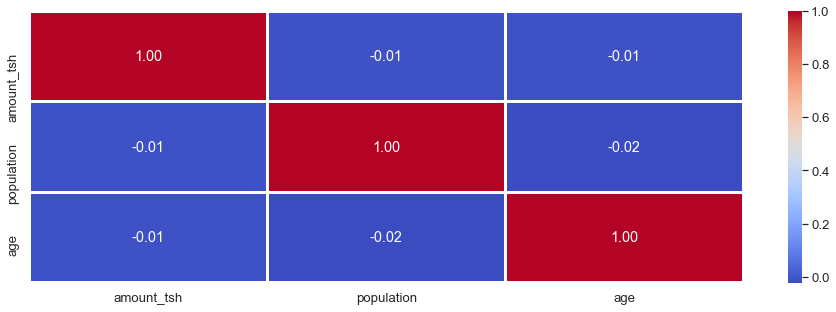

In [65]:
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

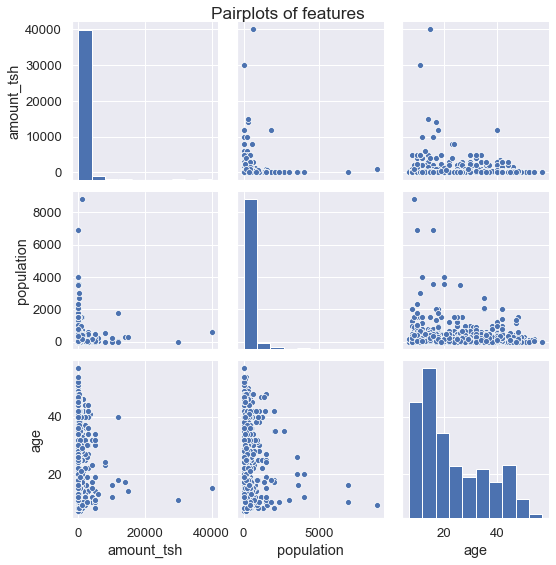

In [66]:
sns.pairplot(df[['amount_tsh','population','age']].sample(1000))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

### Treat Duplicate Values

In [67]:
df.duplicated(keep='first').sum()

9658

In [68]:
df[df.duplicated(keep=False)] #Check duplicate values

,amount_tsh,basin,population,public_meeting,scheme_management,permit,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,status_group,age
0,6000.0,Lake Nyasa,109,True,VWC,False,gravity,user-group,annually,good,enough,groundwater,communal standpipe,functional,21.0
1,25.0,Pangani,250,True,VWC,True,gravity,user-group,per bucket,good,enough,surface,communal standpipe,functional,11.0
6,0.0,Pangani,1,True,Water Board,True,gravity,user-group,monthly,good,enough,groundwater,communal standpipe,functional,11.0
7,0.0,Lake Tanganyika,200,True,VWC,False,handpump,user-group,never pay,good,enough,groundwater,hand pump,functional,29.0
9,0.0,Rufiji,50,True,WUA,True,gravity,user-group,on failure,good,dry,surface,communal standpipe,non functional,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32493,0.0,Lake Rukwa,1,False,VWC,False,handpump,user-group,unknown,unknown,enough,groundwater,hand pump,non functional,35.0
32497,2000.0,Lake Nyasa,0,True,VWC,False,gravity,user-group,annually,good,enough,groundwater,communal standpipe,functional,44.0
32503,6.0,Pangani,1,True,Water Board,True,gravity,user-group,per bucket,good,enough,groundwater,communal standpipe,non functional,12.0
32509,0.0,Pangani,210,True,Water authority,True,gravity,user-group,never pay,good,enough,surface,communal standpipe,non functional,53.0


### Treat Outliers

In [69]:
df.columns

Index(['amount_tsh', 'basin', 'population', 'public_meeting', 'scheme_management', 'permit', 'extraction_type_class', 'management_group', 'payment_type', 'quality_group', 'quantity_group', 'source_class', 'waterpoint_type_group', 'status_group', 'age'], dtype='object')

In [70]:
df.describe()

,amount_tsh,population,age
count,32514.000000,32514.000000,32514.000000
mean,515.297933,257.588639,23.270776
std,3235.720694,548.275049,12.604989
min,0.000000,0.000000,7.000000
25%,0.000000,25.000000,12.000000
50%,0.000000,130.000000,20.000000
75%,250.000000,300.000000,34.000000
max,250000.000000,30500.000000,60.000000


In [71]:
windsorizer = Winsorizer(distribution='skewed',tail='right',fold=3.0, variables=['amount_tsh','population'])

In [72]:
windsorizer.fit(df)

Winsorizer(distribution='skewed', fold=3.0,
           variables=['amount_tsh', 'population'])

In [73]:
df2 = windsorizer.transform(df)

In [74]:
df2

,amount_tsh,basin,population,public_meeting,scheme_management,permit,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,status_group,age
0,1000.0,Lake Nyasa,109.0,True,VWC,False,gravity,user-group,annually,good,enough,groundwater,communal standpipe,functional,21.0
1,25.0,Pangani,250.0,True,VWC,True,gravity,user-group,per bucket,good,enough,surface,communal standpipe,functional,11.0
2,0.0,Ruvuma / Southern Coast,58.0,True,VWC,True,submersible,user-group,never pay,good,dry,groundwater,communal standpipe,non functional,34.0
3,20.0,Pangani,1.0,True,VWC,True,submersible,user-group,per bucket,salty,enough,unknown,communal standpipe,functional,11.0
4,0.0,Wami / Ruvu,345.0,True,Private operator,False,submersible,commercial,never pay,salty,enough,groundwater,other,functional,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32509,0.0,Pangani,210.0,True,Water authority,True,gravity,user-group,never pay,good,enough,surface,communal standpipe,non functional,53.0
32510,500.0,Wami / Ruvu,89.0,True,VWC,True,submersible,user-group,monthly,good,enough,groundwater,communal standpipe,non functional,13.0
32511,10.0,Pangani,125.0,True,Water Board,True,gravity,user-group,per bucket,good,enough,groundwater,communal standpipe,functional,21.0
32512,1000.0,Rufiji,56.0,True,VWC,True,gravity,user-group,annually,good,enough,surface,communal standpipe,functional,24.0


In [75]:
df2.describe()

,amount_tsh,population,age
count,32514.000000,32514.000000,32514.000000
mean,195.524912,217.319893,23.270776
std,339.119814,263.161043,12.604989
min,0.000000,0.000000,7.000000
25%,0.000000,25.000000,12.000000
50%,0.000000,130.000000,20.000000
75%,250.000000,300.000000,34.000000
max,1000.000000,1125.000000,60.000000


In [76]:
windsorizer.left_tail_caps_

{}

In [77]:
windsorizer.right_tail_caps_

{'amount_tsh': 1000.0, 'population': 1125.0}

In [78]:
#Save to csv
#df2.to_csv("train4.csv",index=False)

In [79]:
df2.columns

Index(['amount_tsh', 'basin', 'population', 'public_meeting', 'scheme_management', 'permit', 'extraction_type_class', 'management_group', 'payment_type', 'quality_group', 'quantity_group', 'source_class', 'waterpoint_type_group', 'status_group', 'age'], dtype='object')

In [80]:
#Rearrange columns
df2 = df2[['amount_tsh','age','population','basin','public_meeting', 'scheme_management', 'permit', 
           'extraction_type_class', 'management_group', 'payment_type', 'quality_group', 'quantity_group', 
           'source_class', 'waterpoint_type_group', 'status_group']]

In [81]:
df2

,amount_tsh,age,population,basin,public_meeting,scheme_management,permit,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,status_group
0,1000.0,21.0,109.0,Lake Nyasa,True,VWC,False,gravity,user-group,annually,good,enough,groundwater,communal standpipe,functional
1,25.0,11.0,250.0,Pangani,True,VWC,True,gravity,user-group,per bucket,good,enough,surface,communal standpipe,functional
2,0.0,34.0,58.0,Ruvuma / Southern Coast,True,VWC,True,submersible,user-group,never pay,good,dry,groundwater,communal standpipe,non functional
3,20.0,11.0,1.0,Pangani,True,VWC,True,submersible,user-group,per bucket,salty,enough,unknown,communal standpipe,functional
4,0.0,9.0,345.0,Wami / Ruvu,True,Private operator,False,submersible,commercial,never pay,salty,enough,groundwater,other,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32509,0.0,53.0,210.0,Pangani,True,Water authority,True,gravity,user-group,never pay,good,enough,surface,communal standpipe,non functional
32510,500.0,13.0,89.0,Wami / Ruvu,True,VWC,True,submersible,user-group,monthly,good,enough,groundwater,communal standpipe,non functional
32511,10.0,21.0,125.0,Pangani,True,Water Board,True,gravity,user-group,per bucket,good,enough,groundwater,communal standpipe,functional
32512,1000.0,24.0,56.0,Rufiji,True,VWC,True,gravity,user-group,annually,good,enough,surface,communal standpipe,functional


### Transform label

In [82]:
encoder = LabelEncoder()

In [83]:
df2["status_group"] = encoder.fit_transform(df2["status_group"])

In [84]:
df2 # 0 is functional, 1 is non-functional

,amount_tsh,age,population,basin,public_meeting,scheme_management,permit,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,status_group
0,1000.0,21.0,109.0,Lake Nyasa,True,VWC,False,gravity,user-group,annually,good,enough,groundwater,communal standpipe,0
1,25.0,11.0,250.0,Pangani,True,VWC,True,gravity,user-group,per bucket,good,enough,surface,communal standpipe,0
2,0.0,34.0,58.0,Ruvuma / Southern Coast,True,VWC,True,submersible,user-group,never pay,good,dry,groundwater,communal standpipe,1
3,20.0,11.0,1.0,Pangani,True,VWC,True,submersible,user-group,per bucket,salty,enough,unknown,communal standpipe,0
4,0.0,9.0,345.0,Wami / Ruvu,True,Private operator,False,submersible,commercial,never pay,salty,enough,groundwater,other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32509,0.0,53.0,210.0,Pangani,True,Water authority,True,gravity,user-group,never pay,good,enough,surface,communal standpipe,1
32510,500.0,13.0,89.0,Wami / Ruvu,True,VWC,True,submersible,user-group,monthly,good,enough,groundwater,communal standpipe,1
32511,10.0,21.0,125.0,Pangani,True,Water Board,True,gravity,user-group,per bucket,good,enough,groundwater,communal standpipe,0
32512,1000.0,24.0,56.0,Rufiji,True,VWC,True,gravity,user-group,annually,good,enough,surface,communal standpipe,0


In [85]:
#Save to csv
#df2.to_csv("train5.csv",index=False)

### Perform One-Hot Encoding

In [86]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32514 entries, 0 to 32513
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             32514 non-null  float64
 1   age                    32514 non-null  float64
 2   population             32514 non-null  float64
 3   basin                  32514 non-null  object 
 4   public_meeting         32514 non-null  object 
 5   scheme_management      32514 non-null  object 
 6   permit                 32514 non-null  object 
 7   extraction_type_class  32514 non-null  object 
 8   management_group       32514 non-null  object 
 9   payment_type           32514 non-null  object 
 10  quality_group          32514 non-null  object 
 11  quantity_group         32514 non-null  object 
 12  source_class           32514 non-null  object 
 13  waterpoint_type_group  32514 non-null  object 
 14  status_group           32514 non-null  int32  
dtypes:

In [87]:
df3 = pd.get_dummies(df2,drop_first=True)

In [88]:
df3

,amount_tsh,age,population,status_group,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,public_meeting_True,scheme_management_None,scheme_management_Other,scheme_management_Parastatal,scheme_management_Private operator,scheme_management_SWC,scheme_management_Trust,scheme_management_VWC,scheme_management_WUA,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority,permit_True,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_class_surface,source_class_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,1000.0,21.0,109.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,25.0,11.0,250.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0
2,0.0,34.0,58.0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,20.0,11.0,1.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0
4,0.0,9.0,345.0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32509,0.0,53.0,210.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0
32510,500.0,13.0,89.0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
32511,10.0,21.0,125.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
32512,1000.0,24.0,56.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [89]:
df3.columns

Index(['amount_tsh', 'age', 'population', 'status_group', 'basin_Lake Nyasa', 'basin_Lake Rukwa', 'basin_Lake Tanganyika', 'basin_Lake Victoria', 'basin_Pangani', 'basin_Rufiji', 'basin_Ruvuma / Southern Coast', 'basin_Wami / Ruvu', 'public_meeting_True', 'scheme_management_None', 'scheme_management_Other', 'scheme_management_Parastatal', 'scheme_management_Private operator', 'scheme_management_SWC', 'scheme_management_Trust', 'scheme_management_VWC', 'scheme_management_WUA', 'scheme_management_WUG', 'scheme_management_Water Board', 'scheme_management_Water authority', 'permit_True', 'extraction_type_class_handpump', 'extraction_type_class_motorpump', 'extraction_type_class_other', 'extraction_type_class_rope pump', 'extraction_type_class_submersible', 'extraction_type_class_wind-powered', 'management_group_other', 'management_group_parastatal', 'management_group_unknown', 'management_group_user-group', 'payment_type_monthly', 'payment_type_never pay', 'payment_type_on failure',
      

In [90]:
df3 = df3[['amount_tsh', 'age', 'population','basin_Lake Nyasa', 'basin_Lake Rukwa', 'basin_Lake Tanganyika', 'basin_Lake Victoria', 'basin_Pangani', 'basin_Rufiji', 'basin_Ruvuma / Southern Coast', 'basin_Wami / Ruvu', 'public_meeting_True', 'scheme_management_None', 'scheme_management_Other', 'scheme_management_Parastatal', 'scheme_management_Private operator', 'scheme_management_SWC', 'scheme_management_Trust', 'scheme_management_VWC', 'scheme_management_WUA', 'scheme_management_WUG', 'scheme_management_Water Board', 
           'scheme_management_Water authority', 'permit_True', 'extraction_type_class_handpump', 'extraction_type_class_motorpump', 
           'extraction_type_class_other', 'extraction_type_class_rope pump', 'extraction_type_class_submersible', 
           'extraction_type_class_wind-powered', 'management_group_other', 'management_group_parastatal', 
           'management_group_unknown', 'management_group_user-group', 'payment_type_monthly', 
           'payment_type_never pay', 'payment_type_on failure','payment_type_other', 'payment_type_per bucket', 
           'payment_type_unknown', 'quality_group_fluoride', 'quality_group_good', 'quality_group_milky', 
           'quality_group_salty', 'quality_group_unknown', 'quantity_group_enough', 'quantity_group_insufficient', 
           'quantity_group_seasonal', 'quantity_group_unknown', 'source_class_surface', 'source_class_unknown', 
           'waterpoint_type_group_communal standpipe', 'waterpoint_type_group_dam', 
           'waterpoint_type_group_hand pump', 'waterpoint_type_group_improved spring', 
           'waterpoint_type_group_other', 'status_group']]

In [91]:
df3

,amount_tsh,age,population,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,public_meeting_True,scheme_management_None,scheme_management_Other,scheme_management_Parastatal,scheme_management_Private operator,scheme_management_SWC,scheme_management_Trust,scheme_management_VWC,scheme_management_WUA,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority,permit_True,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_class_surface,source_class_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,status_group
0,1000.0,21.0,109.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,25.0,11.0,250.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
2,0.0,34.0,58.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,20.0,11.0,1.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0
4,0.0,9.0,345.0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32509,0.0,53.0,210.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
32510,500.0,13.0,89.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
32511,10.0,21.0,125.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
32512,1000.0,24.0,56.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0


In [92]:
#Save to csv
#df3.to_csv("train5.csv",index=False)